In [8]:
#importing all libraries and functions
import numpy as np
import pandas as pd
import os
import re
import operator
from sklearn import model_selection
import matplotlib.pyplot as plt

In [9]:
#stop_word, list of stop words (taken from internet)

stop_word=["a","about","above","after","again","against","all","am","an","and","any","are","as","at","be","because","been","before","being","below","between","both","but",
"by","could","did","do","does","doing","down","during","each","few","for","from","further","had","has","have","having","he","he'd","he'll","he's","her",
"here","here's","hers","herself","him","himself","his","how","how's","i","i'd","i'll","i'm","i've","if","in","into","is","it","it's","its","itself","let's","me",
"more","most","my","myself","nor","of","on","once","only","or","other","ought","our","ours","ourselves","out","over","own","same","she",
"she'd","she'll","she's","should","so","some","such","than","that","that's","the","their","theirs","them","themselves","then","there","there's",
"these","they","they'd","they'll","they're","they've","this","those","through","to","too","under","until","up","very","was","we","we'd",
"we'll","we're","we've","were","what","what's","when","when's","where","where's","which","while","who","who's","whom","why","why's","with",
"would","you","you'd","you'll","you're","you've","your","yours","yourself","yourselves"]

In [10]:
#X is a list of tuples where each tuple is of the form : ('document_name', 'document_content')
#Y is the list of categories corresponding to X
X = []
Y = []

for category in os.listdir("20_newsgroups"):
    for document in os.listdir("20_newsgroups/" + category):
        with open("20_newsgroups/" + category + "/" + document, 'r') as f:
            X.append((document,f.read()))
            Y.append(category)

In [11]:
#showing that these are indeed strings (in this case, file paths)

print(len("20_newsgroups"))
print(len("20_newsgroups/"+category))
print(len("20_newsgroups/"+category +'/'+document))

13
30
36


In [12]:
#describing X in detail

print(type(X))         #List of tuples

print(type(X[0]))      #tuple of the form: ('doc_name', 'doc_content')

print(type(X[0][0]))   #doc_name of type string

print(type(X[0][1]))   #doc_content of type string

print(X[0])            #printing first tuple

<class 'list'>
<class 'tuple'>
<class 'str'>
<class 'str'>
('49960', 'Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49960 alt.atheism.moderated:713 news.answers:7054 alt.answers:126\nPath: cantaloupe.srv.cs.cmu.edu!crabapple.srv.cs.cmu.edu!bb3.andrew.cmu.edu!news.sei.cmu.edu!cis.ohio-state.edu!magnus.acs.ohio-state.edu!usenet.ins.cwru.edu!agate!spool.mu.edu!uunet!pipex!ibmpcug!mantis!mathew\nFrom: mathew <mathew@mantis.co.uk>\nNewsgroups: alt.atheism,alt.atheism.moderated,news.answers,alt.answers\nSubject: Alt.Atheism FAQ: Atheist Resources\nSummary: Books, addresses, music -- anything related to atheism\nKeywords: FAQ, atheism, books, music, fiction, addresses, contacts\nMessage-ID: <19930329115719@mantis.co.uk>\nDate: Mon, 29 Mar 1993 11:57:19 GMT\nExpires: Thu, 29 Apr 1993 11:57:19 GMT\nFollowup-To: alt.atheism\nDistribution: world\nOrganization: Mantis Consultants, Cambridge. UK.\nApproved: news-answers-request@mit.edu\nSupersedes: <19930301143317@mantis.co.uk>\nLines: 290\n\nArchive

In [13]:
#splitting X and Y into training and testing data

Xtrain, Xtest, Ytrain, Ytest = model_selection.train_test_split(X, Y)

In [14]:
#size display after splitting

print(len(Xtrain))
print(len(Xtest))
print(len(Ytrain))
print(len(Ytest))
print(set(Ytrain))

7535
2512
7535
2512
{'comp.os.ms-windows.misc', 'rec.sport.baseball', 'rec.autos', 'comp.graphics', 'rec.sport.hockey', 'comp.sys.mac.hardware', 'comp.windows.x', 'rec.motorcycles', 'alt.atheism', 'misc.forsale', 'comp.sys.ibm.pc.hardware'}


In [15]:
#creating dictionary of frequencies corresponding to words

dictn = {}

for i in range(len(Xtrain)):
    text = Xtrain[i][1].lower()
    words = re.split(r'\W+', text)
    for w in words: 
        if not(w.isalpha()) or w in stop_word or len(w) <= 2 :
            continue
        if w in dictn :       #if w is already present, increase frequency
            dictn[w] += 1
        else :
            dictn[w] = 1      #else add w to dictionary with frequency 1
dictn

{'path': 7720,
 'cantaloupe': 9081,
 'srv': 11372,
 'cmu': 18278,
 'edu': 58275,
 'rochester': 1833,
 'udel': 1772,
 'bogus': 589,
 'sura': 1494,
 'net': 9600,
 'news': 12919,
 'feed': 409,
 'peachnet': 356,
 'gatech': 1589,
 'vdbsan': 5,
 'willard': 25,
 'info': 795,
 'martinez': 26,
 'mese': 6,
 'com': 17867,
 'phil': 134,
 'newsgroups': 7700,
 'misc': 3801,
 'forsale': 2081,
 'subject': 8084,
 'decservers': 1,
 'sale': 886,
 'keywords': 760,
 'decserver': 3,
 'message': 8125,
 'date': 7854,
 'mon': 719,
 'apr': 7548,
 'edt': 135,
 'distribution': 1955,
 'atl': 35,
 'computers': 709,
 'organization': 7476,
 'information': 1019,
 'gateway': 326,
 'bbs': 377,
 'lines': 7909,
 'following': 644,
 'items': 128,
 'use': 2574,
 'will': 4174,
 'accept': 208,
 'best': 887,
 'offers': 159,
 'either': 658,
 'brand': 150,
 'new': 2174,
 'interested': 556,
 'send': 730,
 'thanks': 1655,
 'howland': 4189,
 'reston': 4143,
 'ans': 4215,
 'zaphod': 3087,
 'mps': 3393,
 'ohio': 5813,
 'state': 6461,


In [16]:
#sorting the dictionary in descending order on the basis of frequency of words

sorted_dict = sorted(dictn.items(), key = operator.itemgetter(1), reverse = True)
sorted_dict

[('edu', 58275),
 ('cmu', 18278),
 ('com', 17867),
 ('news', 12919),
 ('srv', 11372),
 ('net', 9600),
 ('cantaloupe', 9081),
 ('not', 8630),
 ('comp', 8492),
 ('message', 8125),
 ('subject', 8084),
 ('lines', 7909),
 ('date', 7854),
 ('path', 7720),
 ('newsgroups', 7700),
 ('apr', 7548),
 ('organization', 7476),
 ('gmt', 6767),
 ('can', 6720),
 ('state', 6461),
 ('ohio', 5813),
 ('windows', 5651),
 ('writes', 4487),
 ('one', 4436),
 ('references', 4369),
 ('ans', 4215),
 ('howland', 4189),
 ('will', 4174),
 ('article', 4169),
 ('reston', 4143),
 ('sender', 4028),
 ('posting', 3894),
 ('nntp', 3847),
 ('misc', 3801),
 ('university', 3719),
 ('host', 3702),
 ('rec', 3495),
 ('mps', 3393),
 ('like', 3295),
 ('don', 3179),
 ('usenet', 3160),
 ('get', 3101),
 ('zaphod', 3087),
 ('sys', 3034),
 ('just', 3020),
 ('know', 2887),
 ('max', 2777),
 ('graphics', 2656),
 ('system', 2583),
 ('harvard', 2575),
 ('use', 2574),
 ('near', 2538),
 ('ibm', 2523),
 ('mac', 2492),
 ('hardware', 2487),
 ('no

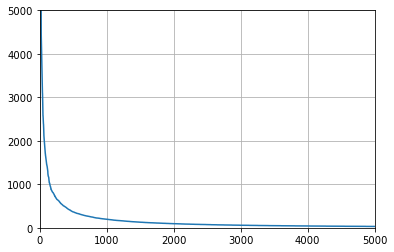

In [17]:
#plotting graph of words vs their frequencies
#then deciding the cutoff frequency

features = sorted_dict
x_var = []
y_var = []
for i in range(len(features)):
    x_var.append(i)                 #words on x axis
    y_var.append(features[i][1])    #frequencies on y axis

plt.plot(x_var, y_var)
plt.axis([0, 5000, 0, 5000])
plt.grid()
plt.show()

In [18]:
#taking top 2000 words (with highest frequencies) as feature-set

feature_set = [features[i][0] for i in range(2000)]
feature_set

['edu',
 'cmu',
 'com',
 'news',
 'srv',
 'net',
 'cantaloupe',
 'not',
 'comp',
 'message',
 'subject',
 'lines',
 'date',
 'path',
 'newsgroups',
 'apr',
 'organization',
 'gmt',
 'can',
 'state',
 'ohio',
 'windows',
 'writes',
 'one',
 'references',
 'ans',
 'howland',
 'will',
 'article',
 'reston',
 'sender',
 'posting',
 'nntp',
 'misc',
 'university',
 'host',
 'rec',
 'mps',
 'like',
 'don',
 'usenet',
 'get',
 'zaphod',
 'sys',
 'just',
 'know',
 'max',
 'graphics',
 'system',
 'harvard',
 'use',
 'near',
 'ibm',
 'mac',
 'hardware',
 'noc',
 'also',
 'das',
 'eng',
 'crabapple',
 'think',
 'new',
 'uunet',
 'sei',
 'forsale',
 'good',
 'time',
 'may',
 'cis',
 'mail',
 'distribution',
 'europa',
 'gtefsd',
 'ece',
 'alt',
 'well',
 'sun',
 'rochester',
 'udel',
 'anyone',
 'people',
 'drive',
 'problem',
 'dos',
 'andrew',
 'file',
 'please',
 'computer',
 'thanks',
 'world',
 'reply',
 'much',
 'now',
 'gatech',
 'gov',
 'utexas',
 'xref',
 'software',
 'see',
 'make',
 'ne

In [19]:
#function to convert document data into matrix dataset form

def make_X_matrix(data) :
    #no. of rows = total documents in data, no. of columns = total words in feature_set
    dataset = np.zeros([len(data), len(feature_set)], int)
    for i in range(len(data)):
        #selecting the 1th attribute of tuple since 0th attribute contains file name
        content = data[i][1].lower()         
        words = re.split(r'\W+', content)
        
        #iterating over each word
        for w in words:
            #if word is not in feature_set, we discard it
            if w in feature_set:
                dataset[i][feature_set.index(w)] += 1
    return dataset

In [20]:
#converting training data from list of tuples to into matrix form 

X_train = make_X_matrix(Xtrain)
print(X_train)
print(X_train.shape)

[[ 2  1  2 ...  0  0  0]
 [11  1  0 ...  0  0  0]
 [ 6  3  1 ...  0  0  0]
 ...
 [ 3  1  7 ...  0  0  0]
 [ 7  1  3 ...  1  0  0]
 [ 8  3  0 ...  0  0  0]]
(7535, 2000)


In [21]:
#converting testing data from list of tuples to into matrix form

X_test = make_X_matrix(Xtest)
print(X_test)
print(X_test.shape)

[[ 7  3  8 ...  0  0  0]
 [ 3  1 11 ...  0  8  0]
 [ 7  1  5 ...  0  0  0]
 ...
 [ 9  3  1 ...  0  0  0]
 [11  7  0 ...  0  0  0]
 [ 7  1  0 ...  0  0  0]]
(2512, 2000)


In [42]:
#Text Classification using Multinomial Naive Bayes Classifier

In [46]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [57]:
#training the classifier on the basis of given training data

clf = MultinomialNB()
clf.fit(X_train, Ytrain)
Y_pred1 = clf.predict(X_test)

In [58]:
#Demonstrating accuracy_score, confusion_matrix and classification_report

print("Score on training data:",clf.score(X_train, Ytrain))
print("Score on testing data:",clf.score(X_test, Ytest))
print()
print(confusion_matrix(Ytest,Y_pred1))
print()
print(classification_report(Ytest,Y_pred1))

Score on training data: 0.9284671532846716
Score on testing data: 0.8957006369426752

[[249   2   0   0   0   0   0   0   4   0   0]
 [  0 193  15  16   1  11   9   1   0   0   1]
 [  0   2 200  14   0  13   4   0   0   0   0]
 [  0   5   4 197  42   0   6   0   0   0   0]
 [  0   3   0   9 217   0   2   0   0   0   0]
 [  0  17  15   3   5 207   2   0   1   0   0]
 [  0   0   1   3   2   0 248   8   0   0   0]
 [  0   0   0   0   0   0   4 237  11   1   2]
 [  0   1   0   0   0   0   2   5 244   0   0]
 [  0   0   0   0   0   0   6   2   3 252   2]
 [  0   0   0   0   0   0   1   0   1   0   6]]

                          precision    recall  f1-score   support

             alt.atheism       1.00      0.98      0.99       255
           comp.graphics       0.87      0.78      0.82       247
 comp.os.ms-windows.misc       0.85      0.86      0.85       233
comp.sys.ibm.pc.hardware       0.81      0.78      0.79       254
   comp.sys.mac.hardware       0.81      0.94      0.87       23

In [56]:
#text classification using naive bayes implementation from scratch

In [22]:
#fit function to train the algorithm

def fit(Xdata, Ydata):
    count = {}        
    Ydata = np.array(Ydata)
    classes = set(Ydata)
    for i in classes:
        temp = 0
        count[i] = {}
        #choose only those rows of X where output is class i
        X_class_i = Xdata[Ydata == i]
        for j in feature_set:
            #sum of occurences of this feature in the rows where output is class i
            count[i][j] = (X_class_i[:, feature_set.index(j)]).sum()
            temp += count[i][j]
        count[i]["count of i"] = X_class_i.shape[0]
        count[i]["total_words"] = temp
    print(classes)
    return count
    

In [23]:
#function to calculate probability of a row in X data falling into a specific class

def prob(Xrow, dic, each_class):
    probability = np.log(dic[each_class]["count of i"]) - np.log(len(Ytrain))
    feature = list(dic[each_class].keys())
    for j in range(len(feature)-2):
        xj = Xrow[j]
        if xj == 0:
            curr_prob = 0
        else:
            num = dic[each_class][feature[j]] + 1
            den = dic[each_class]["total_words"] + len(feature) - 2
            curr_prob = np.log(num) - np.log(den)
        probability += curr_prob
    return probability

In [24]:
#function to predict the y value for a single row of X data

def predict_single(dictionary, Xrow):
    answer = ''
    max_val = -1000
    first_run = True      #true when loop runs for the first time, otherwise false
    classes = dictionary.keys()
    for each_class in classes:
        temp = prob(Xrow, dictionary, each_class)
        #we change max_value when we find a probability value greater than it
        if first_run or temp > max_val:         
            max_val = temp
            answer = each_class
            first_run = False
    return answer 

In [64]:
#function to predict y values when x is given 
def predict(dictionary, dataset):
    y = []
    for d in dataset:
        y.append(predict_single(dictionary, d))
    return y

In [66]:
#training the algorithm using fit function
#then predicting y values on the using the algorithm

dictionary = fit(X_train, Ytrain)
y_pred_train = predict(dictionary, X_train)
y_pred_test = predict(dictionary, X_test)

{'comp.os.ms-windows.misc', 'rec.sport.baseball', 'rec.autos', 'comp.graphics', 'rec.sport.hockey', 'comp.sys.mac.hardware', 'comp.windows.x', 'rec.motorcycles', 'alt.atheism', 'misc.forsale', 'comp.sys.ibm.pc.hardware'}


In [67]:
def score(y1, y2):
    count = 0
    for i in range(len(y1)):
        if y1[i] == y2[i]:
            count+=1
    return (count/len(y1))

In [68]:
score1 = score(Ytrain, y_pred_train)
score2 = score(Ytest, y_pred_test)

In [71]:
#Demonstrating accuracy_score, confusion_matrix and classification_report

print("Score on training data:",score1)
print("Score on testing data:",score2)
print()
print(confusion_matrix(Ytest,Y_pred_test))
print()
print(classification_report(Ytest,Y_pred_test))

Score on training data: 0.9332448573324486
Score on testing data: 0.9056528662420382

[[249   2   0   0   0   0   0   0   4   0   0]
 [  0 193  15  16   1  11   9   1   0   0   1]
 [  0   2 200  14   0  13   4   0   0   0   0]
 [  0   5   4 197  42   0   6   0   0   0   0]
 [  0   3   0   9 217   0   2   0   0   0   0]
 [  0  17  15   3   5 207   2   0   1   0   0]
 [  0   0   1   3   2   0 248   8   0   0   0]
 [  0   0   0   0   0   0   4 237  11   1   2]
 [  0   1   0   0   0   0   2   5 244   0   0]
 [  0   0   0   0   0   0   6   2   3 252   2]
 [  0   0   0   0   0   0   1   0   1   0   6]]

                          precision    recall  f1-score   support

             alt.atheism       1.00      0.98      0.99       255
           comp.graphics       0.87      0.78      0.82       247
 comp.os.ms-windows.misc       0.85      0.86      0.85       233
comp.sys.ibm.pc.hardware       0.81      0.78      0.79       254
   comp.sys.mac.hardware       0.81      0.94      0.87       23

In [72]:
#comparison of scores from above implementations

print("score of inbuit Multinomial Naive Bayes classifier:")
print("Score on training data:",clf.score(X_train,Ytrain))
print("Score on testing data:",clf.score(X_test,Ytest))
print("-----------------")
print("score of self implementation of Naive Bayes: ")
print("Score on training data:",score1)
print("Score on testing data:",score2)

score of inbuit Multinomial Naive Bayes classifier:
Score on training data: 0.9284671532846716
Score on testing data: 0.8957006369426752
-----------------
score of self implementation of Naive Bayes: 
Score on training data: 0.9332448573324486
Score on testing data: 0.9056528662420382
